In [1]:
# 读一下数据集， 分析一下item的稀疏度
import numpy as np
from collections import defaultdict

dataset_name = "Sports_and_Outdoors"


with open(f"/home/zzx/seqRec/CLTrys/CoSeRec/data/{dataset_name}.txt","r") as f:
    raw_data = f.readlines()


Seqs = [each.strip().split(' ')[1:] for each in raw_data]

print("序列总个数",len(Seqs))

lens = np.sort([len(each) for each in Seqs])[::-1]

print("序列平均长度", np.mean(lens))

print("序列最大长度", np.max(lens), "; 序列最小长度", np.min(lens))

# TODO：这里要画一个序列长度的分布图

# 下面要统计一下item 出现次数的分布

item_frequency = defaultdict(int)

for seq in Seqs:
    for each_item in seq:
        item_frequency[each_item] +=1
item_frequency_list = np.sort([item_frequency[each] for each in item_frequency])[::-1]
print("物品个数", len(item_frequency))
print("物品最大频次", np.max(item_frequency_list), "; 物品最小频次", np.min(item_frequency_list))
print(np.sum(item_frequency_list>100))
print(np.sum(item_frequency_list>200))
print(np.sum(item_frequency_list>300))
print("物品平均频次", np.mean(item_frequency_list))

序列总个数 35598
序列平均长度 8.324540704533963
序列最大长度 296 ; 序列最小长度 5
物品个数 18357
物品最大频次 1042 ; 物品最小频次 5
253
52
18
物品平均频次 16.142997221768262


In [15]:
print([each for each in item_frequency_list])

[1042, 763, 647, 513, 427, 401, 398, 393, 372, 359, 357, 355, 349, 344, 343, 323, 309, 307, 298, 293, 288, 282, 279, 266, 258, 256, 252, 244, 243, 243, 242, 242, 236, 236, 234, 233, 231, 226, 224, 223, 221, 220, 220, 219, 219, 218, 216, 213, 205, 204, 202, 201, 200, 198, 194, 194, 193, 193, 193, 192, 191, 191, 188, 185, 184, 182, 182, 181, 180, 180, 177, 177, 176, 175, 174, 172, 171, 169, 169, 167, 166, 165, 165, 165, 164, 163, 163, 162, 162, 160, 159, 159, 158, 158, 158, 156, 156, 155, 154, 153, 152, 152, 151, 151, 149, 149, 148, 148, 147, 146, 144, 144, 144, 142, 142, 141, 141, 141, 141, 140, 140, 140, 139, 139, 137, 137, 137, 137, 136, 135, 134, 134, 134, 132, 132, 132, 132, 132, 131, 131, 130, 129, 129, 129, 129, 129, 128, 128, 128, 127, 127, 127, 127, 126, 125, 125, 125, 125, 125, 125, 125, 124, 124, 123, 123, 123, 122, 122, 122, 122, 121, 121, 121, 121, 120, 120, 120, 119, 119, 119, 118, 118, 118, 118, 117, 116, 116, 115, 115, 115, 114, 114, 114, 114, 113, 113, 113, 113, 113, 113

18104


/tmp/ipykernel_4882/3059993136.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_item_frequency_list, hist=True, kde=False)


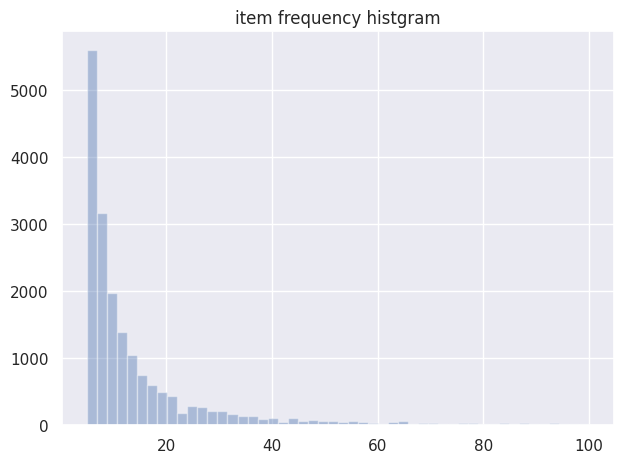

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
sns.set()  #切换到sns的默认运行配置
# sns.distplot(nums,hist=True,norm_hist=False,kde=False,)
temp_item_frequency_list = item_frequency_list[item_frequency_list<=100]
print(len(temp_item_frequency_list))
sns.distplot(temp_item_frequency_list, hist=True, kde=False)
#添加x轴和y轴标签
plt.title("item frequency histgram")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()


<BarContainer object of 18104 artists>

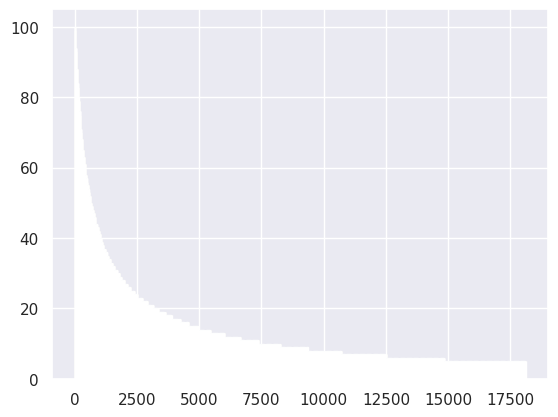

In [23]:
# 改一种画图方式：横轴是item index，纵轴是物品出现频次
# 
temp_item_frequency_list = item_frequency_list[item_frequency_list<=100]
plt.bar([i for i in range(len(temp_item_frequency_list))], temp_item_frequency_list, color='skyblue')


In [29]:
#下面看下序列长度的分布
print([each for each in lens])
print(np.sum(lens>30))
print(np.sum(lens>50))
print(np.sum(lens>100))

[296, 142, 139, 115, 103, 100, 97, 96, 94, 92, 92, 92, 89, 89, 89, 88, 88, 86, 86, 83, 82, 82, 78, 78, 77, 77, 73, 72, 69, 69, 68, 68, 67, 66, 66, 66, 65, 64, 63, 63, 62, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 56, 55, 55, 55, 55, 55, 55, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

<BarContainer object of 35179 artists>

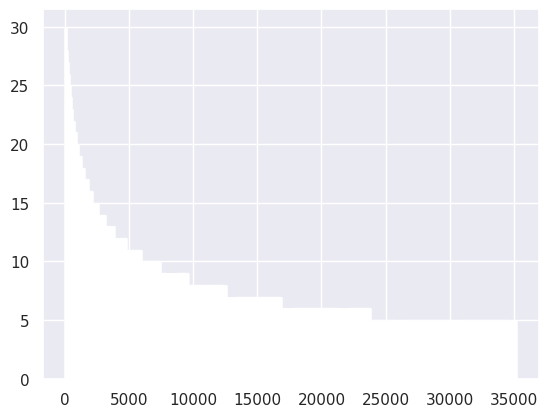

In [30]:
temp_lens = lens[lens<=30]
plt.bar([i for i in range(len(temp_lens))], temp_lens, color='skyblue')


In [4]:
# TODO: 这里要把谁是高频物品，谁是低频物品 / 谁是高频用户，谁是低频用户存一下

head_user_tail_item = []
head_user_head_item = []
tail_user_head_item = []
tail_user_tail_item = []

user_threshold = 8
item_threshold = 16
for i in range(len(Seqs)):
    seq = Seqs[i]
    if len(seq) <= user_threshold:
        tail_user= True
    else:
        tail_user=False
    if item_frequency[seq[-1]]<=item_threshold:
        tail_item = True
    else:
        tail_item = False
    if (not tail_user) and tail_item:
        head_user_tail_item.append(i)
    elif (not tail_user) and (not tail_item):
        head_user_head_item.append(i)
    elif tail_user and (not tail_item):
        tail_user_head_item.append(i)
    elif tail_user and tail_item:
        tail_user_tail_item.append(i)
print(len(head_user_tail_item), len(head_user_head_item), len(tail_user_head_item), len(tail_user_tail_item))
import pickle
with open(f"/home/zzx/seqRec/CLTrys/CoSeRec/data/{dataset_name}_head_tail.pkl","wb") as f:
    pickle.dump({"head_user_tail_item":np.array(head_user_tail_item), "head_user_head_item":np.array(head_user_head_item),
                "tail_user_head_item":np.array(tail_user_head_item), "tail_user_tail_item":np.array(tail_user_tail_item)}, f)
    

4557 5416 14019 11606


In [7]:
temp_temp1 = np.random.rand(len(Seqs), 20)
temp_temp2 = np.random.rand(len(Seqs), 1)
print(temp_temp1.shape)
a = temp_temp1[np.array(head_user_tail_item)]
print(len(head_user_tail_item))
print(a.shape)
b = temp_temp2[np.array(head_user_tail_item)]
print(b.shape)

(35598, 20)
4557
(4557, 20)
(4557, 1)
